# 2. Modelos de distribución multivariados
## 2.1. Funciones de distribución y densidad

<p align="right">
Autor: Emmanuel Alcalá
<br>
<a href="https://scholar.google.com.mx/citations?hl=en&user=3URusCgAAAAJ&view_op=list_works&sortby=pubdate">Google Scholar</a>
</p>

<p align="left">
<br>
<a href="https://jealcalat.github.io/Analisis_multivariado/">Regresar a la página del curso</a>
</p>

---


## 2.0. Preliminares

Referencia: [Capítulo 6 de Mathematics for Machine Learning](https://mml-book.github.io/book/mml-book.pdf)

---

### Variables aleatorias

Suponer que $X$ representa una cantidad desconocida de interés, como la temperatura de una máquina. Si los valores de $X$ son desconocidos o cambian, decimos que $X$ es una variable aleatoria, o **VA**. El conjunto de todos los valores *posibles* se denota como $\mathcal{X}$, llamado espacio muestral o espacio de estados. Un evento es un *sub*conjunto de valores del espacio muestral. Por ejemplo, si $\mathcal{X}$ es el lado de un dado al ser lanzado, $\mathcal{X} = \{ 1, 2, 3, 4, 5, 6 \}$, el evento "cae 1" se denota $X = 1$, y "ver un número impar" se denota $X \in \{ 1, 3, 4\}$, el evento "cae entre 4 y 6" como $4 \leq X \leq 6$.

**Nota**: no confundir el espacio muestral $\mathcal{X}$ con la VA $X$. En el segundo caso, la VA toma valores numéricos (de hecho, es una función de los elementos de $\mathcal{X}$).

#### VA discretas

Si $\mathcal{X}$ es finito o contable infinito (cada miembro de $\mathcal{X}$ puede asociarse con un elemento de $\mathbb{N}$), entonces $X$ es una variable aleatoria *discreta*. En este caso, denotamos la probabilidad de un evento que $X$ toma como $\text{Pr}(X=x)$. Definimos la **función de masa de probabilidad** (pmf en inglés) como la función que computa la probabilidad de cada valor de la VA

$$
  p(x) \overset{\Delta}{=} \text{Pr}(X = x)
$$

$p(x)$ satisface $0\leq p(x) \leq 1$ y $\sum_{x\in \mathcal{X}} p(x) = 1$.

#### VA continuas

Si $\mathcal{X}\in \mathbb{R}$ es una función real, se denomina *variable aleatoria continua*. En este caso no se puede crear un conjunto contable de valores posibles que $X$ puede tomar, pero podemos crear un conjunto finito de *intervalos* en la linea real, y asociar los eventos de $X$ que están en esos intervalos.

##### Distribución acumulada (cdf)

Sea $A = (X \leq a)$, $B = (X \leq b)$ y $C = (a < X \leq b)$ en donde $a < b$. Tenemos que $B$ es la unión de $A$ y $C$, es decir, $B$ toma todos los valores que toman $A$ y $C$. Dado que $A$ y $C$ son mutuamente excluyentes, la probabilidad de $B$ es

$$\text{Pr}(B) = \text{Pr}(A) + \text{Pr}(C)$$

Y la probabilidad de estar en el intervalo $C$ como

$$\text{Pr}(C) = \text{Pr}(B) - \text{Pr}(A)$$

Definimos la distribución de probabilidad acumulada como 

$$
   P(x) \overset{\Delta}{=} \text{Pr}(X \leq x)
$$

Con esto, podemos calcular la probabilidad de estar en un intervalo como

$$
  \text{Pr}(a < X \leq b) = P(b) - P(a)
$$

En el siguiente gráfico se representa la función de probabilidad acumulada normal. 

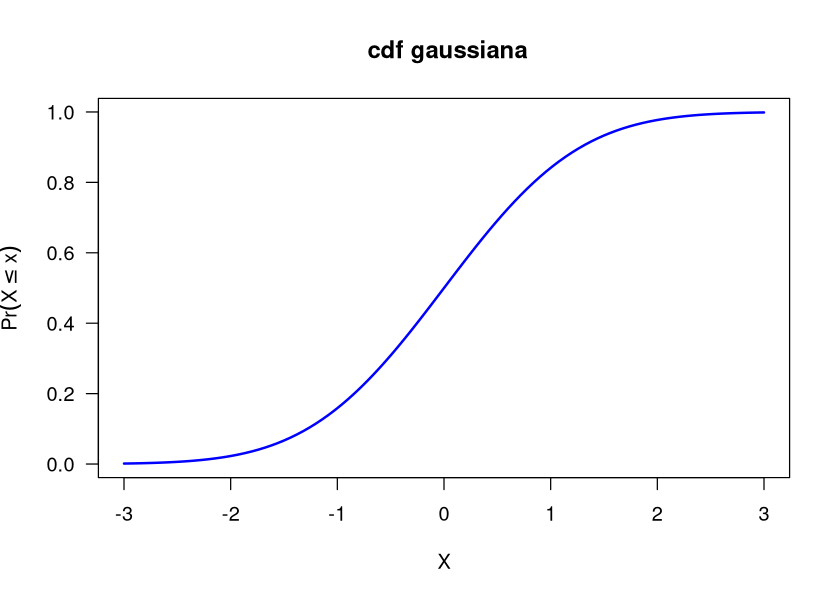

In [17]:
par(las=1)
options(repr.plot.width=7, repr.plot.height=5)
curve(pnorm(x, mean = 0, sd = 1),
  from = -3, to = 3, main = " cdf gaussiana",
  xlab = 'X', ylab = expression(Pr(X <= x)),
  col = 'blue', lwd = 2
)